# PENDAHULUAN

Project ini akan membahas tentang prediksi jenis kerusakan mesin berdasarkan data sensor:

- Vibration_X
- Vibration_Y
- Acoustic_Level
- Temperature
- Timestamp

Dan model akan mengeluarkan prediksi berdasarkan 4 klasifikasi:
1. Normal
2. Imbalance
3. Bearing Fault
4. Overheating




# Perencanaan

Sebelum menjalankan project ini ada beberapa perencanaan sebelum menjalankan project ini, dan aku akan membagi dari beberapa klasifikasi

1. EDA (Exploratory Data Analysis)

Tujuan dari dari EDA(Exploratory Data Analysis) sendiri adalah untuk memahami isi data sebeleum kita membuat model nya,ada beberapa yang perlu kita cek dari data ini:
-  Ada berapa jumlah baris dan kolom
-  Tipe data nya apa
-  Apakah di data nya terdapat Missing Value(Jika iya kita harus menghandle missing value agar prediksi model lebih baik, jika tidak ada missing value bisa dibiarkan saja)
-  Statistik data sensor
-  Distribusi masing masing sensor
-  Distribusi Kelas (ada berapa banyak julah Normal , Fault, dll)
-  Korelasi Fitur
-  Visualisasi (Data Visual)



2. Preprocessing + Future Engineering

Di bagian ini kita akan menyiapkan data sebelum dilatih sebagai model, hal yang dilakukan:

1. Convert TimeStamp -> DateTime
2. Ambil isi dari TimeStamp seperti (Hour, Minute, dll) -> sesuai kecocokan
3. Scaling Sensor (StandardScaler)
4. LabelEncoder untuk Target
5. Split Train Test (Memisahkan data train dan data validasi) -> Train 0.8 Validasi 0.2
6. Feature Engineering (Opsional):
-  Vibration Magnitude = sqrt (x2 + y2 + z2)
-  Rata Rata atau perbedaan antar vibration axis

3. Model Train

aku akan mencoba beberapa model seperti :
- RandomForest
- XGBoost
- MLP


Intinya disini aku akan mencari dan memilih model terbaik agar model prediksi Kerusakan Mesin dengan akurat

4. Evaluation

Setelah model dijalankan aku pasti harus mencari tau :    
- Akurasi dari model aku
- Confusion Matrix
- Classification Report
- Interpretasi Model (Model apa yang bagus ataupun yang kurang bagus)



In [2]:

from google.colab import files
import pandas as pd


df = files.upload()
data = pd.read_csv('datatrain.csv')



Saving datatrain.csv to datatrain.csv


**EDA (Exploratoy Data Analysis)**

In [4]:
data.head()

,Timestamp,Vibration_X,Vibration_Y,Vibration_Z,Acoustic_Level,Temperature,Fault_Type
0,2024-01-02 06:14:00,0.186573,0.193336,0.224626,24.762336,59.278761,Normal
1,2024-01-22 13:57:00,0.284977,0.321766,0.236176,30.514945,88.773213,Overheating
2,2024-01-16 07:11:00,0.471037,0.659048,0.406148,47.100926,66.414209,Imbalance
3,2024-01-13 23:41:00,0.437769,0.523685,0.299959,58.611390,69.998793,Imbalance
4,2024-01-04 01:53:00,0.171922,0.216380,0.105515,27.004190,62.480057,Normal


In [5]:
data.isna().sum()


,0
Timestamp,0
Vibration_X,0
Vibration_Y,0
Vibration_Z,0
Acoustic_Level,0
Temperature,0
Fault_Type,0


Data menunjukan tidak ada Missing Values yang membuat kita untuk tidak harus menghandle missing values

In [6]:
data.shape

(25600, 7)

Di data tersebut terdapat 25600 row data dan terdapat 7 kolom

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       25600 non-null  object 
 1   Vibration_X     25600 non-null  float64
 2   Vibration_Y     25600 non-null  float64
 3   Vibration_Z     25600 non-null  float64
 4   Acoustic_Level  25600 non-null  float64
 5   Temperature     25600 non-null  float64
 6   Fault_Type      25600 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


(Model Ml hanya mengerti tipe data numerik)

Di data tersebut menunjukan bahwa setiap sensor mempunyai tipe data numerik (yang berarti cocok untuk menjadi fitur) terkecuali TimeStamp yang masih bertipe object yang mengharuskan kita untuk mengubah tipe data nya menjad numerik, dan fitur yang kita pakai adalah ('Timestamp','Vibration_X','Vibration_Y','Vibration_Z','Acoustic_Level','Temperature') sedangkan Target nya adalah ('Fault_Type')

catatan : Fault_Type masih berupa tipe data object yang mengharuskan kita mengubah/menghandle tipe data nya (encode)

In [8]:
data.describe()

,Vibration_X,Vibration_Y,Vibration_Z,Acoustic_Level,Temperature
count,25600.000000,25600.000000,25600.000000,25600.000000,25600.000000
mean,0.449675,0.480375,0.419693,46.294651,72.491776
std,0.239924,0.257804,0.222938,17.157253,11.922005
min,0.015582,0.008167,0.017246,12.232175,51.068792
25%,0.250291,0.259807,0.239741,32.267526,62.233479
50%,0.382843,0.418194,0.349910,42.148973,69.552977
75%,0.622031,0.671945,0.570831,58.292535,80.820895
max,1.153653,1.224538,1.099511,105.360481,108.660532


Ini berguna untuk melihat range vibrasi , acoustic level, temperatue, outlier

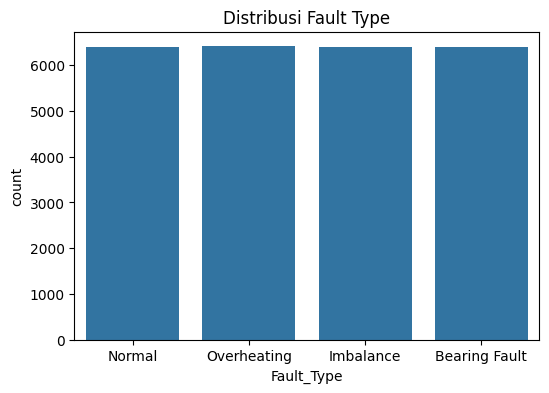

,count
Fault_Type,
Bearing Fault,6385
Imbalance,6405
Normal,6398
Overheating,6412


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Fault_Type")
plt.title("Distribusi Fault Type")
plt.show()

data['Fault_Type'].value_counts().sort_index()



Distribusi ini berguna untuk menunjukan setiap kategori (Normal,Overheating,Imbalance,Bearing Fault) mempunyai jumlah data yang hampir sama , Nah ini berarti dataset kita bersifat balanced sehingga model ga bias ke salah satu kategori

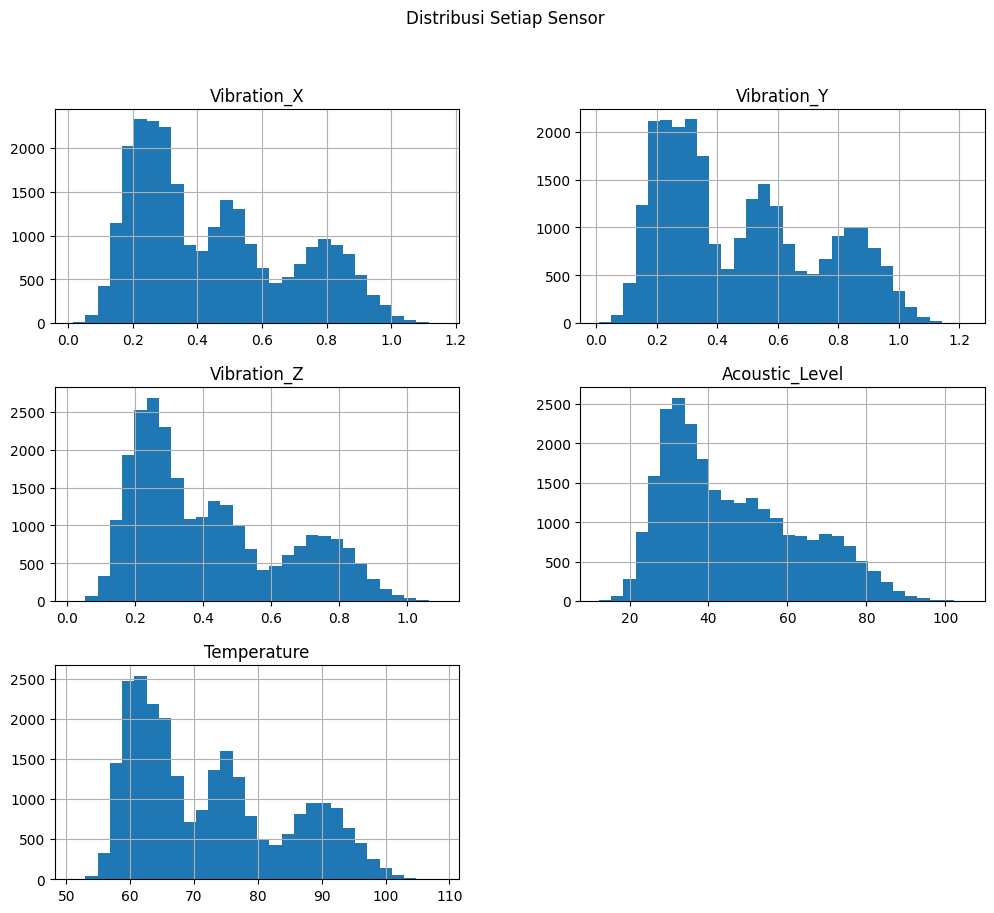

In [10]:
data.hist(figsize=(12,10), bins=30)
plt.suptitle("Distribusi Setiap Sensor")
plt.show()

Semua sensor memiliki distribusi right-skewed, artinya mayoritas data berada pada nilai rendah (kondisi normal), dan nilai tinggi lebih jarang (sering berhubungan dengan fault). Pada sensor getaran (X, Y, Z) terlihat pola bimodal, yang menunjukkan adanya dua kondisi operasi berbeda: normal dan fault. Acoustic Level dan Temperature menunjukkan skewness yang kuat ke kanan, menandakan adanya beberapa event suara/temperatur tinggi yang jarang tetapi penting untuk mendeteksi anomali.

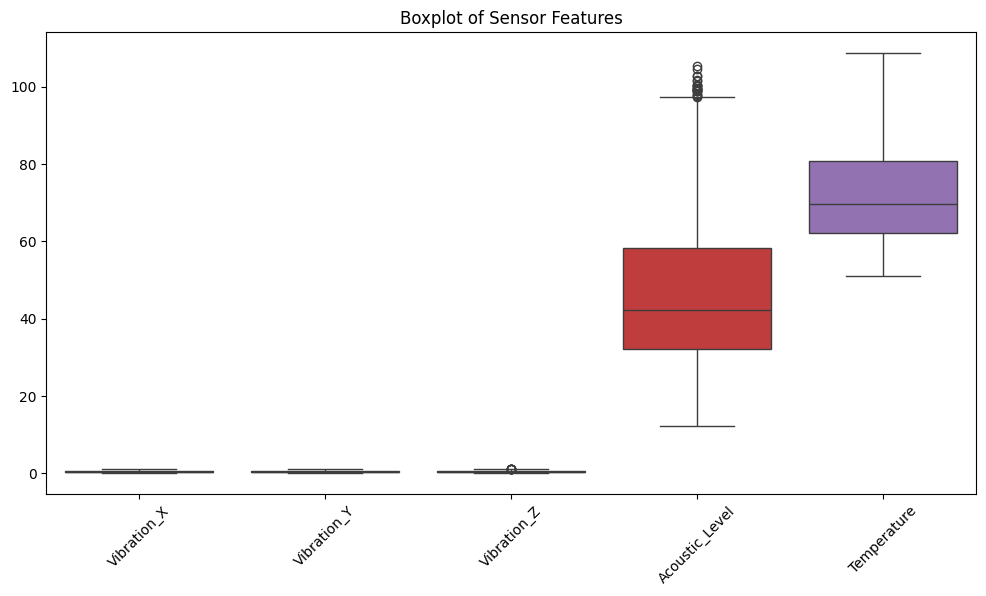

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data.drop(columns=["Timestamp","Fault_Type"]))
plt.xticks(rotation=45)
plt.title("Boxplot of Sensor Features")
plt.show()


Boxplot menunjukkan bahwa fitur getaran (Vibration_X, Vibration_Y, Vibration_Z) memiliki rentang yang kecil dan distribusi yang rapat, dengan beberapa outlier yang kemungkinan berhubungan dengan kondisi fault.

Acoustic_Level dan Temperature memiliki skala yang jauh lebih besar. Acoustic_Level menunjukkan banyak outlier pada nilai tinggi (menandakan event kebisingan ketika fault terjadi), sedangkan Temperature menunjukkan pola yang lebih stabil dengan outlier minimal.

Perbedaan skala antar fitur terlihat sangat jelas, sehingga normalisasi/standardisasi mungkin diperlukan untuk beberapa model Machine Learning.

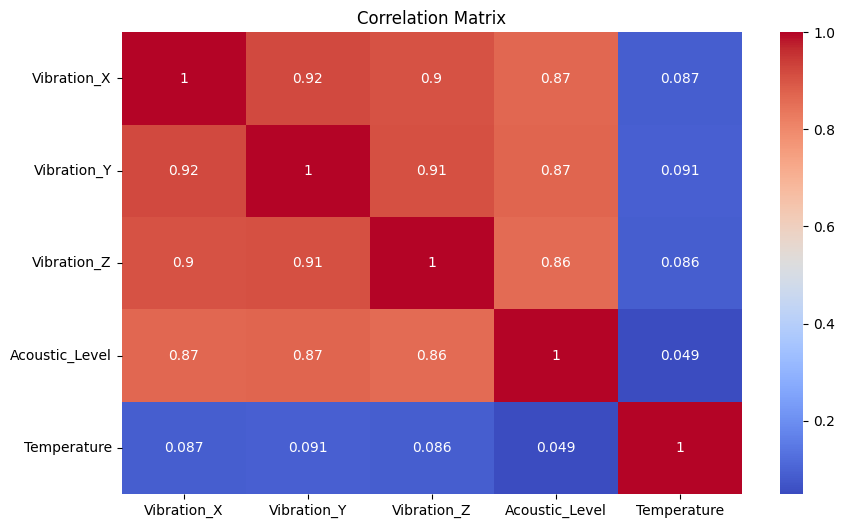

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(columns=["Timestamp","Fault_Type"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Korelasi antar fitur menunjukkan bahwa sensor getaran (Vibration_X, Vibration_Y, Vibration_Z) memiliki korelasi sangat tinggi, yang menandakan bahwa ketiganya mendeteksi fenomena fisik yang sama. Acoustic_Level juga berkorelasi tinggi dengan ketiga getaran, sehingga kenaikan getaran biasanya diikuti kenaikan kebisingan.

Temperature memiliki korelasi rendah terhadap sensor lain, menandakan bahwa ia menyumbang informasi yang berbeda dan penting untuk mendeteksi kondisi overheating.

Secara keseluruhan, fitur-fitur ini memberikan kombinasi informasi yang saling melengkapi untuk prediksi Fault_Type.

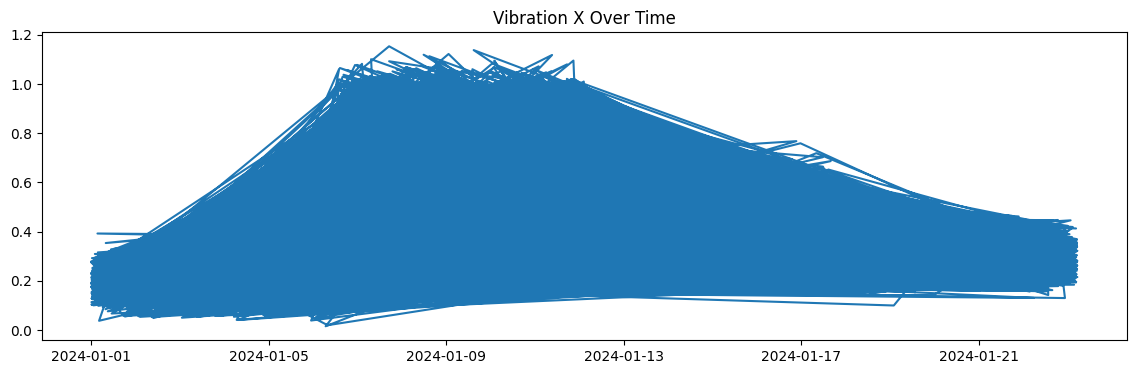

In [13]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

plt.figure(figsize=(14,4))
plt.plot(data["Timestamp"], data["Vibration_X"])
plt.title("Vibration X Over Time")
plt.show()


Time-series plot sensor Vibration_X menunjukkan adanya tren kenaikan getaran pada pertengahan waktu dan penurunan kembali di akhir rentang waktu. Pola ini menandakan perubahan kondisi mesin, kemungkinan dari normal → fault → kembali normal.

In [15]:
import numpy as np
data["Vibration_Magnitude"] = np.sqrt(
    data["Vibration_X"]**2 + data["Vibration_Y"]**2 + data["Vibration_Z"]**2
)

data["Vibration_Magnitude"].head()


,Vibration_Magnitude
0,0.350208
1,0.490433
2,0.906188
3,0.745562
4,0.295822


Fitur Vibration_Magnitude menggabungkan ketiga sumbu getaran menjadi satu nilai total getaran, yang lebih representatif secara fisik dan lebih informatif untuk model machine learning.

**PREPROCESSING + FUTURE ENGINEERING**

In [16]:
data.Timestamp = pd.to_datetime(data.Timestamp)
data.Hour = data['Timestamp'].dt.hour
data.Minute = data['Timestamp'].dt.minute
data.Second = data['Timestamp'].dt.second

/tmp/ipython-input-2683709869.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Hour = data['Timestamp'].dt.hour
/tmp/ipython-input-2683709869.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Minute = data['Timestamp'].dt.minute
/tmp/ipython-input-2683709869.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Second = data['Timestamp'].dt.second


Di data terdapat kolom bernama Timestamp yang dimana tipe data kolom tersebut adalah object. Model di MachineLearning tidak dapat mengerti/membaca sebuah tipe data object, jadi oleh karena itu kita harus mengubah tipe data timestamp menjadi sebuah tipe data datetime64, lalu kita juga harus memisahkan dan mengubah minute,hour n second karena model ML tidak bisa memahami satu baris panjang timestamp dan selain itu juga memisahkan minute,hour,second bermanfaat untuk model Ml belajar tentang data Fault_Type yang dimana sensor mesin berkaitan dengan waktu(hour,minute,second)

In [17]:
data = data.drop(columns = ['Timestamp'])

Karena sudah membuat kolom baru (Hour,Minutue,Second) , Kolom timestamp tidak diperlukan lagi sehingga kita dapat hapus kolom tersebut, Kenapa? karena sebelum nya kita sebelum nya sudah memisahkan hour,minute,second dimana model dapat mempelajari hubungan antara waktu operasi mesin dan terjadinya Fault_Type

In [18]:
import numpy as np

data['Vibration_Magnitude'] = np.sqrt(
    data['Vibration_X']**2 +
    data['Vibration_Y']**2 +
    data['Vibration_Z']**2
)

Di data terdapat 3 sensor getaran (X,Y,Z), model ML tidak dapat mengerti langsung hubungan 3 sensor getaran tersebut membentuk satu besar geteran total(vibrasi total), jadi oleh karena itu,dibuatlah kolom baru yang bernama Vibration_Magnitude yang dihitung dengan rumus di bawah. Manfaat bagi model ML adalah model dapat mengerti langsung hubungan 3 sensor getaran secara bersamaan setelah dilakukan nya pembuatan kolom baru

In [19]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
data['Fault_Type_encoded'] = encode.fit_transform(data['Fault_Type'])
data[['Fault_Type','Fault_Type_encoded']].head()

,Fault_Type,Fault_Type_encoded
0,Normal,2
1,Overheating,3
2,Imbalance,1
3,Imbalance,1
4,Normal,2


Jika sebelum nya data type kolom dari date_times sudah kita ubah menjadi numerik, sekarang kita akan ubah tipe data dari kolom Fault_Type , kolom fault_type memiliki sebuah data type sebuah object yang dimana model ML tidak mengerti value dari object itu sendiri, dan kita harus mengubah data type tersebut ke numerik, akan tetapi value/column dari fault_type sendiri itu tidak seperti value kolom kolom lain nya, Kolom Fault_Type adalah sebuah 'Categorical Variables', yang dimana kita harus encode kolom tersebut.

In [ ]:
encode.classes_

array(['Bearing Fault', 'Imbalance', 'Normal', 'Overheating'],
      dtype=object)

encode class ini hanya berguna untuk kita mengetahui kategori asli apa yang dipelajarin di label encoder, dan output dari encode sendiri adalah sebagai berikut

- Bearing Fault -> 0
- Imbalance -> 1
- Normal -> 2
- Overheating ->3

In [20]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Fault_Type','Fault_Type_encoded'])
y = data.Fault_Type_encoded

Train_X, Val_X, Train_Y,Val_Y = train_test_split(X,y,test_size=0.2,
                                                 random_state=42,stratify=y)

Train_X.shape, Val_X.shape


((20480, 6), (5120, 6))

selanjut nya kita melakukan model validation agar model kita akurat,dan metode yg kita lakukan adalah cross validation/sample cross yang dimana kita membagi data menjadi 2, yaitu data lama (yang sudah digunakan di dalam model) dan data baru (data yang akan diuji dalam membuat model lebih akurat dan stabil)

- X melakukan drop kolom Fault type dan Fault Type encoded , jadi X hanya menampung value dari kolom selain Fault Type dan Fault Type encoded, dan X menjadi sebuah fitur(bahan bahan untuk hal yg diprediksi)
- Y menyimpan kolom Fault type encoded tanpa melibatkan kolom yang lain, dan Y ini akan menjadi sebuah target(hal yg diprediksi)
- training = 80 % dan Validasi = 20 %, random state hanya memastikan pembagian nya konsisten dan stratify hanya memastikan data validasi dan training seimbang

Data train terdiri dari 20480 baris/row dan 6 kolom fitur sedangkan Data validasi terdiri dari 5120 baris/row dan 6 fitur/kolom

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Train_X_scaled = scaler.fit_transform(Train_X)
Val_X_scalaed = scaler.transform(Val_X)

Karena di fitur sensor berbeda beda besaran nya, kita harus melakukan scalinng , kenapa? karena model ML tidak suka kalau fitur beda skala yang jauh banget, contoh:
1. Hour = 0 - 23
2. VibrationX = 0.01 - 2.5
3. Acoustic Level = 20 - 160

Oleh karena itu model ML hanya jadi peduli ke angka yang besar bukan ke yang penting,dan bisa menyebabkan model menjadi bias ke fitur yang besar angka nya.

Scaling sendiri adalah metode dimana kita membikin semua fitur mempunyai skala yang sama besar agar model tidak bias, rumus nya sendiri adalah : x - mean / stdDeviasi

**MODEL TRAINING**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [12, 20, None],
    "min_samples_split": [2, 5]
}

gs_rf = GridSearchCV(rf, rf_params, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
t0 = time.time()
gs_rf.fit(Train_X, Train_Y)
t1 = time.time()
best_rf = gs_rf.best_estimator_
print("RandomForest best params:", gs_rf.best_params_, "CV score:", gs_rf.best_score_, f"time: {t1-t0:.1f}s")


from sklearn.metrics import accuracy_score
y_pred_rf = best_rf.predict(Val_X)
akurasi_randomForest = accuracy_score(Val_Y, y_pred_rf)
print("RandomForest akurasi:", akurasi_randomForest)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
RandomForest best params: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 100} CV score: 0.9998046827304642 time: 91.8s
RandomForest akurasi: 1.0


oke di model random forest menghasilkan angka akurasi yang sempurna = 100 % , tapi dengan hal ini kita harus hati hati karena bisa jadi saja data nya termasuk data leakage(kebocoran data), jadi kita harus mengecek apakah model benar benar memprediksi 100 % benar tanpa ada kesalahan, dan kita akan mengecek nya dengan confusion matrix

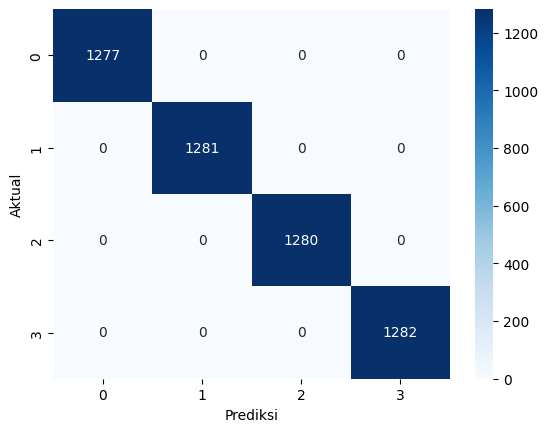

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Val_Y, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Aktual")
plt.xlabel("Prediksi")
plt.show()


dari hasil confusion matrix menghasilkan perfext 100 % , dan data benar benar valid dan bukan data leakage. Model memprediksi benar semua tanpa ada kesalalahan

In [35]:
import time
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

try:
    import xgboost as xgb

    model_x = xgb.XGBClassifier(use_label_encoder=False,
                                eval_metric="mlogloss",
                                random_state=42,
                                n_jobs=-1)

    param_x = {
        "n_estimators": [100, 250],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.05]
    }


    search_x = RandomizedSearchCV(
        model_x, param_x, n_iter=20, cv=3,
        scoring="accuracy", n_jobs=-1, random_state=42, verbose=1
    )

    t0 = time.time()
    search_x.fit(Train_X, Train_Y)
    t1 = time.time()

    best_xgb = search_x.best_estimator_
    print("XGBoost best params:", search_x.best_params_, "CV:", search_x.best_score_,
          f"time:{t1-t0:.1f}s")

    y_pred_xgb = best_xgb.predict(Val_X)
    akurasi_xgb = accuracy_score(Val_Y, y_pred_xgb)
    print("XGBoost akurasi (Val):", akurasi_xgb)

except Exception as e:
    print("xgboost error (pindah ke HGB). Error:", e)

    hgb = HistGradientBoostingClassifier(random_state=42)
    params_hgb = {"max_iter": [100, 200], "max_depth": [None, 12]}
    gs_hgb = GridSearchCV(hgb, params_hgb, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)

    t0 = time.time()
    gs_hgb.fit(Train_X, Train_Y)
    t1 = time.time()

    best_xgb = gs_hgb.best_estimator_
    print("HGB best params:", gs_hgb.best_params_, "CV:", gs_hgb.best_score_, f"time:{t1-t0:.1f}s")

    y_pred_xgb = best_xgb.predict(Val_X)
    akurasi_xgb = accuracy_score(Val_Y, y_pred_xgb)
    print("HGB akurasi (Val):", akurasi_xgb)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
XGBoost best params: {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.1} CV: 0.9997558498366268 time:20.4s
XGBoost akurasi (Val): 0.99921875


Model XGboost sangat kuat di data ini, skor cv dan validasi sama sama 99% , perbedaan kecil antara cv dan val (0.9997555 - 0.999219) tidak menunjukan data itu overfitting

              precision    recall  f1-score   support

           0     1.0000    0.9992    0.9996      1277
           1     0.9969    1.0000    0.9984      1281
           2     1.0000    0.9977    0.9988      1280
           3     1.0000    1.0000    1.0000      1282

    accuracy                         0.9992      5120
   macro avg     0.9992    0.9992    0.9992      5120
weighted avg     0.9992    0.9992    0.9992      5120



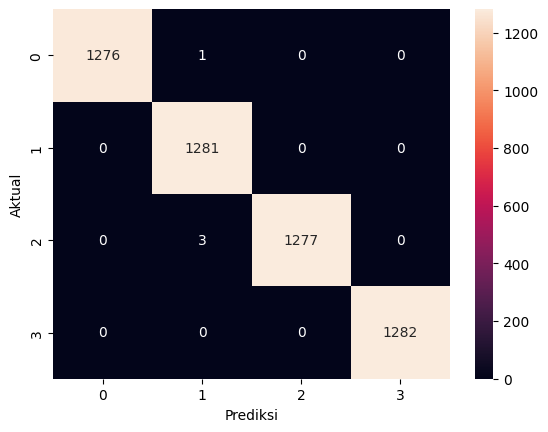

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt
y_pred = best_xgb.predict(Val_X)
print(classification_report(Val_Y, y_pred, digits=4))
cm = confusion_matrix(Val_Y, y_pred)
sns.heatmap(cm, annot=True, fmt='d'); plt.xlabel("Prediksi"); plt.ylabel("Aktual"); plt.show()

dari confusion matrix dapat dilihat bahwa model hanya melakukan kesalahan yang sangat sedikit
1. tingkatan 0 melalakukan kesalahan 1 kali diprediksi pada tingkatan 1
2. tingkatan 1 menebak benar semua
3. tingkatan 2 melakukan kesalahan 3 kali diprediksi pada tingkatan 1
4. tingkatan 3 menebak benar semua

In [41]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

pipe_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, n_iter_no_change=10))
])

mlp_params = {
    "mlp__hidden_layer_sizes": [(64,), (128,), (64,32)],
    "mlp__alpha": [1e-4, 1e-3, 1e-2],
    "mlp__learning_rate_init": [0.001, 0.01]
}

gs_mlp = GridSearchCV(pipe_mlp, mlp_params, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
t0 = time.time()
gs_mlp.fit(Train_X, Train_Y)
t1 = time.time()
best_mlp = gs_mlp.best_estimator_

print("MLP best params:", gs_mlp.best_params_,
      " CV:", gs_mlp.best_score_, f"time:{t1-t0:.1f}s")


y_pred_mlp = best_mlp.predict(Val_X)
akurasiMLP = accuracy_score(Val_Y, y_pred_mlp)
print("MLP TEST accuracy:", akurasiMLP)




Fitting 3 folds for each of 18 candidates, totalling 54 fits
MLP best params: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (128,), 'mlp__learning_rate_init': 0.01}  CV: 0.9998046684246509 time:37.0s
MLP TEST accuracy: 1.0


di model ini setelah dilakukan percobaan 18 kombinasi parameter dan diuji memakai 3 fold(total nya 54 training),MLP menemukan settingan terbaik nya yaitu hidden layer dengan 128 neuron,alpha 0.001 dan learning rate 0.01

CV akurasi dengan 0.9998 dan pas dipaka di validasi akurasi nya adalah 100% (tidak ada salah sama sekali)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1277
           1     1.0000    1.0000    1.0000      1281
           2     1.0000    1.0000    1.0000      1280
           3     1.0000    1.0000    1.0000      1282

    accuracy                         1.0000      5120
   macro avg     1.0000    1.0000    1.0000      5120
weighted avg     1.0000    1.0000    1.0000      5120



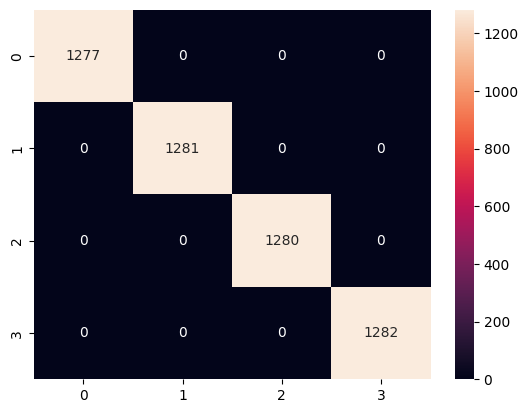

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_mlp.predict(Val_X)
print(classification_report(Val_Y, y_pred, digits=4))
sns.heatmap(confusion_matrix(Val_Y, y_pred), annot=True, fmt='d'); plt.show()


Dari pengecekan kembali menggunakan confusion matrix terlihat kalo model MLP memprediksi semua tingkatan dengan sempurna dan tidak ada kesalahan pada prediksi

**EVALUASI DAN SUBMISSION**

In [51]:
fl = files.upload()
sol = pd.read_csv('solution.csv')

Saving solution.csv to solution (2).csv


In [55]:
import os, glob, pandas as pd, numpy as np


if 'features' not in globals():
    if 'X' in globals():
        features = list(X.columns)
        print("features dibuat dari X.columns:", features)
    elif 'Train_X' in globals():
        features = list(Train_X.columns)
        print("features dibuat dari Train_X.columns:", features)
    else:
        raise RuntimeError("Tidak menemukan X atau Train_X untuk membuat 'features'. Jalankan preprocessing dulu!.")


candidates = glob.glob("solution*.csv") + glob.glob("*solution*.csv")
if not candidates:
    candidates = [f for f in os.listdir('.') if f.lower().startswith('solution')]

if not candidates:
    raise RuntimeError("Gagal menemukan file solution.csv di working directory. Pastikan sudah upload file!.")
else:
    sol_path = candidates[0]
    sol = pd.read_csv(sol_path)
    print("Loaded solution file:", sol_path, " shape:", sol.shape)

if set(['Vibration_X','Vibration_Y','Vibration_Z']).issubset(sol.columns) and 'Vibration_Magnitude' not in sol.columns:
    sol['Vibration_Magnitude'] = np.sqrt(sol['Vibration_X']**2 + sol['Vibration_Y']**2 + sol['Vibration_Z']**2)
    print("Vibration_Magnitude dibuat di sol.")
if 'Timestamp' in sol.columns and 'Hour' not in sol.columns:
    sol['Timestamp'] = pd.to_datetime(sol['Timestamp'], errors='coerce')
    sol['Hour'] = sol['Timestamp'].dt.hour
    print("Hour dibuat di sol dari Timestamp.")


missing_in_sol = [f for f in features if f not in sol.columns]
if missing_in_sol:
    print("Warning: fitur fitur ini tidak ada di sol:", missing_in_sol)
    print("Kamu perlu menambahkan preprocessing yang sama seperti training atau update features jika memang berbeda.")
else:
    sol = sol[features].copy()
    print("sol sudah berisi semua fitur dan sudah di reorder sesuai features. Siap diprediksi.")


print("\Preview sol (3 baris pertama):")
display(sol.head(3))


Loaded solution file: solution (2).csv  shape: (6400, 7)
Vibration_Magnitude dibuat di sol.
Hour dibuat di sol dari Timestamp.
sol sudah berisi semua fitur dan sudah di reorder sesuai features. Siap diprediksi.
\Preview sol (3 baris pertama):


,Vibration_X,Vibration_Y,Vibration_Z,Acoustic_Level,Temperature,Vibration_Magnitude
0,0.259595,0.123741,0.278931,34.185115,56.147609,0.400629
1,0.247835,0.164334,0.192892,28.757117,58.822799,0.354451
2,0.594495,0.617636,0.447488,46.827427,60.612006,0.967028


Di atas dilakukan pengecekan di file solusi.csv sebelum diprediksi ,pengecekan
dilakukan agar file submission dan train sekorelasi dan siap diprediksi

Ringkasan akurasi: {'RandomForest': 1.0, 'XGBoost/HGB': None, 'MLP': None}
Model terbaik berdasarkan akurasi test: RandomForest

Evaluasi pada data validasi
Akurasi pada data validasi: 1.000000

Laporan klasifikasi:

               precision    recall  f1-score   support

Bearing Fault     1.0000    1.0000    1.0000      1277
    Imbalance     1.0000    1.0000    1.0000      1281
       Normal     1.0000    1.0000    1.0000      1280
  Overheating     1.0000    1.0000    1.0000      1282

     accuracy                         1.0000      5120
    macro avg     1.0000    1.0000    1.0000      5120
 weighted avg     1.0000    1.0000    1.0000      5120



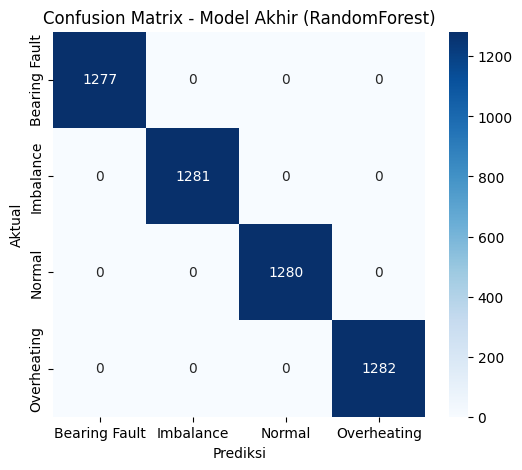


Melatih ulang model terbaik menggunakan seluruh data training (X, y)...
Refit selesai dalam 2.8 detik
Tersimpan: models/scaler_full.pkl (scaler fit pada seluruh X) untuk produksi.
Tersimpan: models/final_model.pkl, label_encoder.pkl, features_list.pkl

Persiapan prediksi untuk solution.csv (X_submit)...

Selesai! file submission_predictions.csv sudah tersimpan. contoh 5 baris pertama:


,id,Fault_Type
0,0,Normal
1,1,Normal
2,2,Normal
3,3,Normal
4,4,Normal


Tersimpan: models/training_summary.txt

Selesai!!! — Model final tersimpan dan file prediksi dibuat


In [60]:
import os, time, joblib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

os.makedirs("models", exist_ok=True)


diperlukan = ["Train_X","Val_X","Train_Y","Val_Y","X","y","features","sol"]
hilang = [v for v in diperlukan if v not in globals()]
if hilang:
    raise RuntimeError(f"Variabel yang dibutuhkan belum tersedia: {hilang}. Jalankan preprocessing / training cells dulu ya:).")


hasil_model = {
    "RandomForest": float(acc_rf) if 'acc_rf' in globals() and acc_rf is not None else None,
    "XGBoost/HGB": float(acc_xgb) if 'acc_xgb' in globals() and acc_xgb is not None else None,
    "MLP": float(acc_mlp) if 'acc_mlp' in globals() and acc_mlp is not None else None
}
print("Ringkasan akurasi:", hasil_model)


valid = {k:v for k,v in hasil_model.items() if v is not None}
if not valid:
    raise RuntimeError("Tidak ada hasil akurasi tersedia (acc_rf/acc_xgb/acc_mlp). Jalankan training cells dulu ya:).")


nama_terbaik = max(valid, key=valid.get)
print("Model terbaik berdasarkan akurasi test:", nama_terbaik)


if nama_terbaik == "RandomForest":
    model_terbaik = best_rf
elif nama_terbaik == "XGBoost/HGB":
    model_terbaik = best_xgb
else:
    model_terbaik = best_mlp


print("\nEvaluasi pada data validasi")
pred_val = model_terbaik.predict(Val_X)
akurasi_validasi = accuracy_score(Val_Y, pred_val)
print(f"Akurasi pada data validasi: {akurasi_validasi:.6f}")
print("\nLaporan klasifikasi:\n")
print(classification_report(Val_Y, pred_val, target_names=list(encode.classes_), digits=4))

cm = confusion_matrix(Val_Y, pred_val)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encode.classes_, yticklabels=encode.classes_, cmap="Blues")
plt.title(f"Confusion Matrix - Model Akhir ({nama_terbaik})")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

print("\nMelatih ulang model terbaik menggunakan seluruh data training (X, y)...")
t0 = time.time()
model_terbaik.fit(X, y)
t1 = time.time()
waktu_refit = t1 - t0
print(f"Refit selesai dalam {waktu_refit:.1f} detik")


scaler_produksi = None
if not hasattr(model_terbaik, "named_steps"):
    if 'scaler' in globals():
        try:
            scaler_produksi = StandardScaler().fit(X)
            joblib.dump(scaler_produksi, "models/scaler_full.pkl", compress=3)
            print("Tersimpan: models/scaler_full.pkl (scaler fit pada seluruh X) untuk produksi.")
        except Exception as e:
            print("Peringatan: gagal membuat/menyimpan scaler produksi:", e)
else:
    scaler_produksi = None


joblib.dump(model_terbaik, "models/final_model.pkl", compress=3)
joblib.dump(encode, "models/label_encoder.pkl", compress=3)
joblib.dump(features, "models/features_list.pkl", compress=3)
print("Tersimpan: models/final_model.pkl, label_encoder.pkl, features_list.pkl")

print("\nPersiapan prediksi untuk solution.csv (X_submit)...")
if not set(features).issubset(sol.columns):
    print("Beberapa fitur tidak ada di sol —> mencoba buat fitur standar (Timestamp -> Hour, Vibration_Magnitude)...")
    if 'Timestamp' in sol.columns:
        sol['Timestamp'] = pd.to_datetime(sol['Timestamp'], errors='coerce')
        if set(['Vibration_X','Vibration_Y','Vibration_Z']).issubset(sol.columns):
            sol['Vibration_Magnitude'] = np.sqrt(sol['Vibration_X']**2 + sol['Vibration_Y']**2 + sol['Vibration_Z']**2)
        sol['Hour'] = sol['Timestamp'].dt.hour
    else:
        print("Peringatan: sol tidak memiliki kolom Timestamp — pastikan sol telah diproses sama seperti data training.")


try:
    X_submit = sol[features].copy()
except Exception as e:
    raise RuntimeError(f"Gagal membuat X_submit dari daftar features: {e}")


if X_submit.isna().sum().sum() > 0:
    print("Peringatan: ditemukan missing values pada X_submit —> mengisi dengan 0 (ubah algoritma/strategi jika perlu).")
    X_submit = X_submit.fillna(0)


if hasattr(model_terbaik, "named_steps"):
    preds_numeric = model_terbaik.predict(X_submit)
else:
    if scaler_produksi is not None:
        X_submit = scaler_produksi.transform(X_submit)
    preds_numeric = model_terbaik.predict(X_submit)


pred_labels = encode.inverse_transform(preds_numeric)


if "id" in sol.columns:
    submission = pd.DataFrame({"id": sol["id"], "Fault_Type": pred_labels})
else:
    submission = pd.DataFrame({"id": sol.index, "Fault_Type": pred_labels})

submission.to_csv("submission_predictions.csv", index=False)
print("\nSelesai! file submission_predictions.csv sudah tersimpan. contoh 5 baris pertama:")
display(submission.head())


ringkasan = f"hasil={hasil_model}\nbest_model={nama_terbaik}\nvalidation_accuracy={akurasi_validasi}\nrefit_time_s={waktu_refit:.1f}\n"
with open("models/training_summary.txt","w") as f:
    f.write(ringkasan)
print("Tersimpan: models/training_summary.txt")

print("\nSelesai!!! — Model final tersimpan dan file prediksi dibuat")


**KESIMPULAN**

Pada project ini, aku membangun sistem klasifikasi untuk mendeteksi jenis kerusakan pada peralatan berputar berdasarkan data sensor (getaran, suara, dan temperatur). Setelah melalui proses EDA, preprocessing, dan feature engineering, aku mencoba tiga model berbeda: Random Forest, XGB, dan MLPClassifier.

Hasil akhirnya  semua model perform dengan sangat baik, tapi model yang paling stabil dan konsisten adalah Random Forest, dengan akurasi 100% pada data validasi. Confusion matrix juga menunjukkan kalau model berhasil mengenali keempat jenis fault (Bearing Fault, Imbalance, Normal, Overheating) tanpa kesalahan prediksi.

Setelah itu model terbaik aku latih ulang menggunakan seluruh data training untuk mendapatkan performa maksimal, lalu dipakai buat memprediksi data di solution.csv. Hasil prediksinya udah disimpan sebagai file submission_predictions.csv